## PCA and Linear Regression
Group 11 is using a combination of Bill, Elysa Jessica's code to complete the analysis. 
PCA will be conducted to see how variables interact within the Flinn-Engdahl regions and seeing if it is possible to do linear regression with these regions. Location variables were left out of the PCA to see if other variables would contribute to the dataset as much as longitude and latitude do. 

# Data Cleanup

This part of the code will be dedicated towards cleaning up the imported data. Regions and b-values will be added to the overall data set to allow for more in depth, grouped analysis. 

In [1]:
#read in R script containing useful functions to get us going with the data
#more detailed descriptions for each function can be found inside the R script file
source('initialize_data.R', echo = FALSE)

In [2]:
install.packages('spdep')
load_libraries()

also installing the dependencies ‘gtools’, ‘gdata’, ‘spData’, ‘deldir’, ‘boot’, ‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’

Warning message in install.packages("spdep"):
“installation of package ‘gtools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘fields’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("spdep"):
“installation of package ‘spdep’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::la

[1] "libraries loaded successfully"


In [3]:
#Explicit location of main project data
path <- "~/jupyter/cs2019_Group11/GroupProducts/data" 

#create df from main project data
df <- loadFiles(path) %>%
    reqCols %>%
    parseDt('time')

#create spatial point df
dfsp <- tospdf(df)

Files in "~/jupyter/cs2019_Group11/GroupProducts/data" loaded.
Subset Completed.
Parsed column: time.
spatial df created


In [12]:
#takes about 10 minutes to run
#adds Flinn-Engdahl regions to spatial point df and converts coordinate system
tpts <-regions_data(dfsp)

OGR data source with driver: LIBKML 
Source: "/dsa/home/ewghbb/jupyter/cs2019_Group11/GroupProducts/fe.kmz", layer: "fe"
with 754 features
It has 12 fields


Warning message in readOGR(tectonicdata):
“Z-dimension discarded”

[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"
[1] "none"


In [13]:
#Check Data
head(df)
head(dfsp)
head(tpts)

time,latitude,longitude,depth,mag,id,updated,time_Date,time_Time,time_Year
1999-07-01 23:29:27,45.4500,3.790,2.000,2.6,usp0009awp,2014-11-07 01:08:01,1999-07-01,18:29:27,1999
1999-07-01 22:10:51,46.7105,-122.778,4.613,3.1,uw10474128,2016-07-23 18:59:57,1999-07-01,17:10:51,1999
1999-07-01 21:42:41,51.9950,177.972,106.800,4.2,usp0009awk,2014-11-07 01:08:01,1999-07-01,16:42:41,1999
1999-07-01 20:50:11,-31.7260,-72.053,26.100,3.9,usp0009awh,2014-11-07 01:08:01,1999-07-01,15:50:11,1999
1999-07-01 19:52:19,59.8900,-153.560,136.300,3.1,usp0009awf,2014-11-07 01:08:01,1999-07-01,14:52:19,1999
1999-07-01 19:52:12,36.0500,31.166,30.200,3.8,usp0009awe,2014-11-07 01:08:01,1999-07-01,14:52:12,1999


          coordinates   depth mag                time         id
1       (3.79, 45.45)   2.000 2.6 1999-07-01 23:29:27 usp0009awp
2 (-122.778, 46.7105)   4.613 3.1 1999-07-01 22:10:51 uw10474128
3   (177.972, 51.995) 106.800 4.2 1999-07-01 21:42:41 usp0009awk
4  (-72.053, -31.726)  26.100 3.9 1999-07-01 20:50:11 usp0009awh
5    (-153.56, 59.89) 136.300 3.1 1999-07-01 19:52:19 usp0009awf
6     (31.166, 36.05)  30.200 3.8 1999-07-01 19:52:12 usp0009awe
              updated
1 2014-11-07 01:08:01
2 2016-07-23 18:59:57
3 2014-11-07 01:08:01
4 2014-11-07 01:08:01
5 2014-11-07 01:08:01
6 2014-11-07 01:08:01

           coordinates   depth mag                time         id
1  (421900.9, 5059471)   2.000 2.6 1999-07-01 23:29:27 usp0009awp
2 (-13667580, 5199789)   4.613 3.1 1999-07-01 22:10:51 uw10474128
3  (19811750, 5788057) 106.800 4.2 1999-07-01 21:42:41 usp0009awk
4 (-8020903, -3531722)  26.100 3.9 1999-07-01 20:50:11 usp0009awh
5 (-17094220, 6666924) 136.300 3.1 1999-07-01 19:52:19 usp0009awf
6   (3469383, 4013068)  30.200 3.8 1999-07-01 19:52:12 usp0009awe
              updated newname
1 2014-11-07 01:08:01     374
2 2016-07-23 18:59:57       6
3 2014-11-07 01:08:01       1
4 2014-11-07 01:08:01      53
5 2014-11-07 01:08:01      24
6 2014-11-07 01:08:01     741

In [16]:
#Bill
#converting spatial point df back to normal df in order to plot more meaningful visualizations
tpts_df <- as.data.frame(tpts)
tpts_df$latitude = df$latitude
tpts_df$longitude = df$longitude
tpts_df = parseDt(tpts_df,'time')
head(tpts_df)

Parsed column: time.


depth,mag,time,id,updated,newname,coords.x1,coords.x2,latitude,longitude,time_Date,time_Time,time_Year
2.000,2.6,1999-07-01 23:29:27,usp0009awp,2014-11-07 01:08:01,374,421900.9,5059471,45.4500,3.790,1999-07-01,18:29:27,1999
4.613,3.1,1999-07-01 22:10:51,uw10474128,2016-07-23 18:59:57,6,-13667584.4,5199789,46.7105,-122.778,1999-07-01,17:10:51,1999
106.800,4.2,1999-07-01 21:42:41,usp0009awk,2014-11-07 01:08:01,1,19811752.4,5788057,51.9950,177.972,1999-07-01,16:42:41,1999
26.100,3.9,1999-07-01 20:50:11,usp0009awh,2014-11-07 01:08:01,53,-8020903.3,-3531722,-31.7260,-72.053,1999-07-01,15:50:11,1999
136.300,3.1,1999-07-01 19:52:19,usp0009awf,2014-11-07 01:08:01,24,-17094221.0,6666924,59.8900,-153.560,1999-07-01,14:52:19,1999
30.200,3.8,1999-07-01 19:52:12,usp0009awe,2014-11-07 01:08:01,741,3469383.3,4013068,36.0500,31.166,1999-07-01,14:52:12,1999


In [17]:
#Bill + Elysa 
#finding top ten Flinn-Engdahl regions by max magnitude occuring in that region

#grouping and summarising by max mag
tpts_df_mm = tpts_df %>% group_by(newname) %>% summarise(max(mag))

#changing column name to max_mag for easier use
colnames(tpts_df_mm) <- c('newname', 'max_mag')

#ordering by descending max_mag
tpts_df_mm = arrange(tpts_df_mm, desc(max_mag))

#displaying top then regions and their max_mags
top_ten_mag_regions = head(tpts_df_mm, 10)
top_ten_mag_regions

newname,max_mag
197,9.1
570,9.1
54,8.8
593,8.6
191,8.4
65,8.4
171,8.3
553,8.3
669,8.3
60,8.2


In [19]:
#Creating a new dataframe with only the top ten regions 
keep <- c("197","570","54","593","191","65","171","553","669","60")
tpts_df = tpts_df[tpts_df$newname %in% keep, ]
head(tpts_df)
dim(tpts_df)

,depth,mag,time,id,updated,newname,coords.x1,coords.x2,latitude,longitude,time_Date,time_Time,time_Year
8,33.0,4.5,1999-07-01 19:26:28,usp0009awc,2014-11-07 01:08:01,171,17029433,5151977.4,46.281,152.978,1999-07-01,14:26:28,1999
29,33.0,4.7,1999-07-01 11:12:37,usp0009avm,2014-11-07 01:08:00,669,15842656,4709482.4,42.306,142.317,1999-07-01,06:12:37,1999
36,33.0,4.4,1999-07-01 04:33:16,usp0009avb,2014-11-07 01:08:00,669,15790002,4711040.9,42.320,141.844,1999-07-01,23:33:16,1999
104,28.5,3.1,1999-06-29 16:21:37,usp0009asu,2014-11-07 01:07:58,54,-7985504,-3674767.7,-33.011,-71.735,1999-06-29,11:21:37,1999
143,33.0,4.9,1999-06-28 23:12:08,usp0009ara,2014-11-07 01:07:57,593,10728082,298558.9,2.682,96.372,1999-06-28,18:12:08,1999
182,38.7,3.4,1999-06-28 07:26:08,usp0009apz,2014-11-07 01:07:57,54,-7930289,-3601964.8,-32.357,-71.239,1999-06-28,02:26:08,1999


[1] 35046    13

In [37]:
#Finds the unique values of the regions in the dataframe 
regions = unique(tpts_df$newname)
regions

[1] "171" "669" "54"  "593" "65"  "570" "191" "197" "60"  "553"

# PCA 

After cleaning up the data a PCA will be performed by creating dataframes for each of the top ten highest magnitude regions. From there each region will have its own PCA performed to see how variables interact with each other. Graphs of each PCA will also be created using a for loop. 

In [71]:
#Testing to see if I can create dataframes basinf on unique regions using a for loop to save time 
#After the dataframes are seperated by region then I can create a PCA for each one 
for (i in c(1,2,3,4,5,6,7,8,9,10)) {
  assign(paste0("df_", i), subset(tpts_df, newname == regions[i],select=c(depth,mag,time_Year)) )
}

dflist = list(df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_9,df_10)

for (i in 1:length(dflist)) {
  assign(paste0("PCA_", i),prcomp(dflist[[i]], center = TRUE,scale. = TRUE ))
}

In [72]:
#Testing to see if the PCA was created for all ten values 
summary(PCA_10)

Importance of components:
                          PC1    PC2  PC3
Standard deviation     1.0909 1.0000 0.90
Proportion of Variance 0.3967 0.3334 0.27
Cumulative Proportion  0.3967 0.7300 1.00

In [73]:
#Created a base function to create PCA based on region
#Region can be changed to continent or whatever variable you'd like to use 
PCAFunc = function(df){
    regions = unique(df$newname)
regions
for (i in c(1,2,3,4,5,6,7,8,9,10)) {
  assign(paste0("df_", i), subset(df, newname == regions[i],select=c(depth,mag,time_Year)) )
}

dflist = list(df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_9,df_10)

for (i in 1:length(dflist)) {
  assign(paste0("PCA_", i),prcomp(dflist[[i]], center = TRUE,scale. = TRUE ))
}
    }

In [74]:
#testing to see if my PCA function worked 
PCAFunc(tpts_df)
summary(PCA_10)

Importance of components:
                          PC1    PC2  PC3
Standard deviation     1.0909 1.0000 0.90
Proportion of Variance 0.3967 0.3334 0.27
Cumulative Proportion  0.3967 0.7300 1.00

In [75]:
#importing libraries to visualize the PCA
library(devtools)
options(unzip = "internal")
devtools::install_github("vqv/ggbiplot")

from URL https://api.github.com/repos/vqv/ggbiplot/zipball/master
Installing ggbiplot
Warning message in system(paste(TAR, "--version >", tf, "2>&1")):
“error in running command”Warning message in system(cmd):
“error in running command”Warning message in utils::untar(src, exdir = target, compressed = "gzip"):
“‘/bin/gtar -xf '/tmp/RtmppVPn67/ggplot2_3.2.0.tar.gz' -C '/tmp/RtmppVPn67/devtools11c50f8f1c1'’ returned error code 127”Warning message in system(paste(TAR, "--version >", tf, "2>&1")):
“error in running command”Installation failed: error in running command
'/opt/conda/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/RtmppVPn67/devtools11c26da414c/vqv-ggbiplot-7325e88'  \
  --library='/opt/conda/lib/R/library' --install-tests 



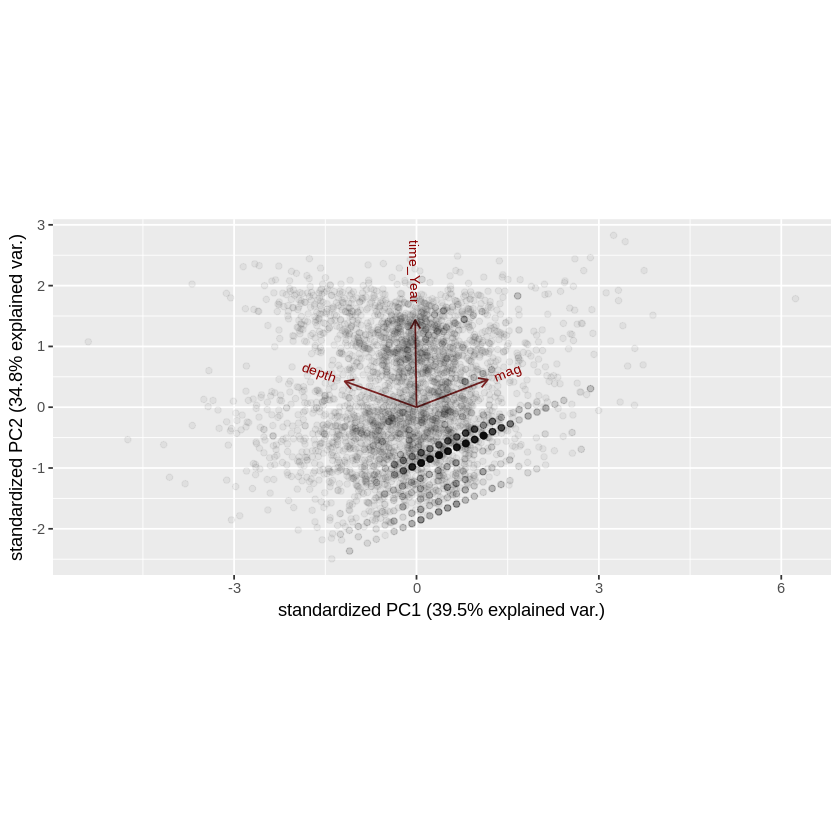

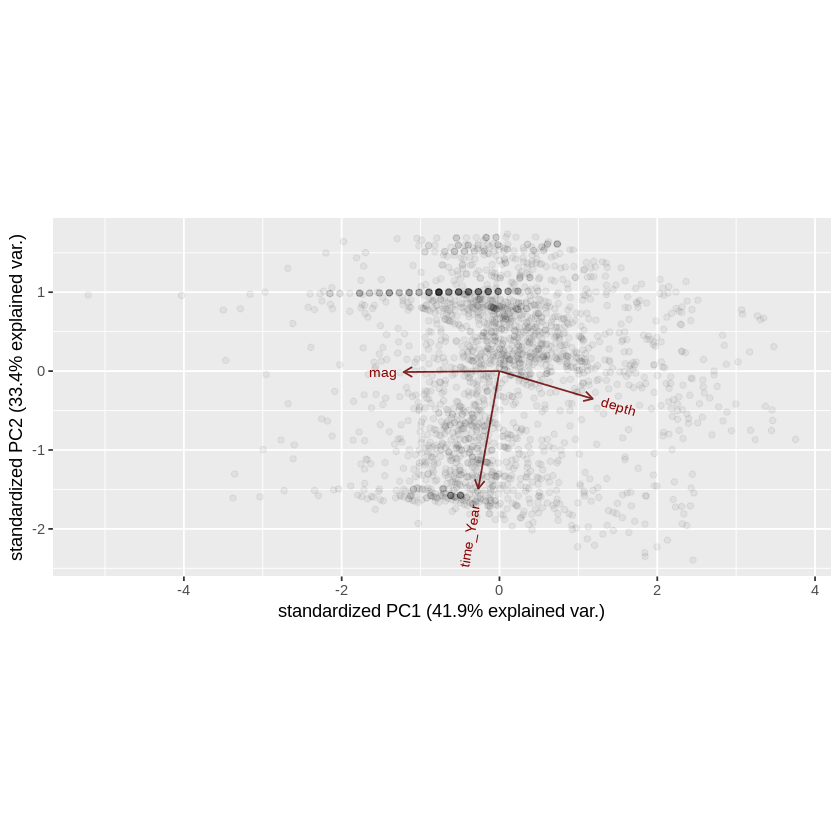

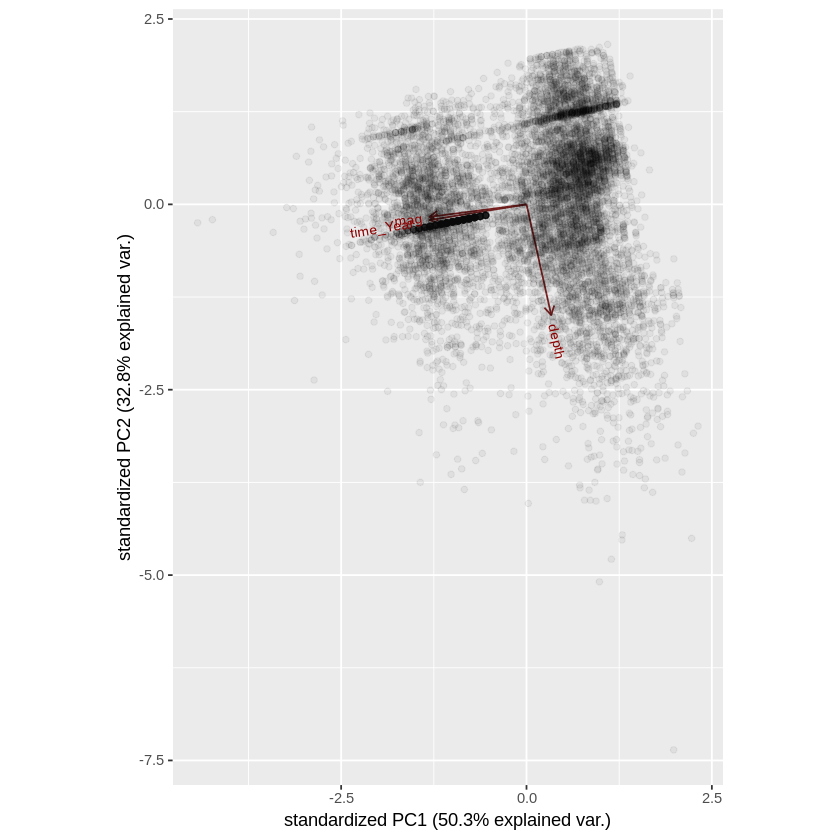

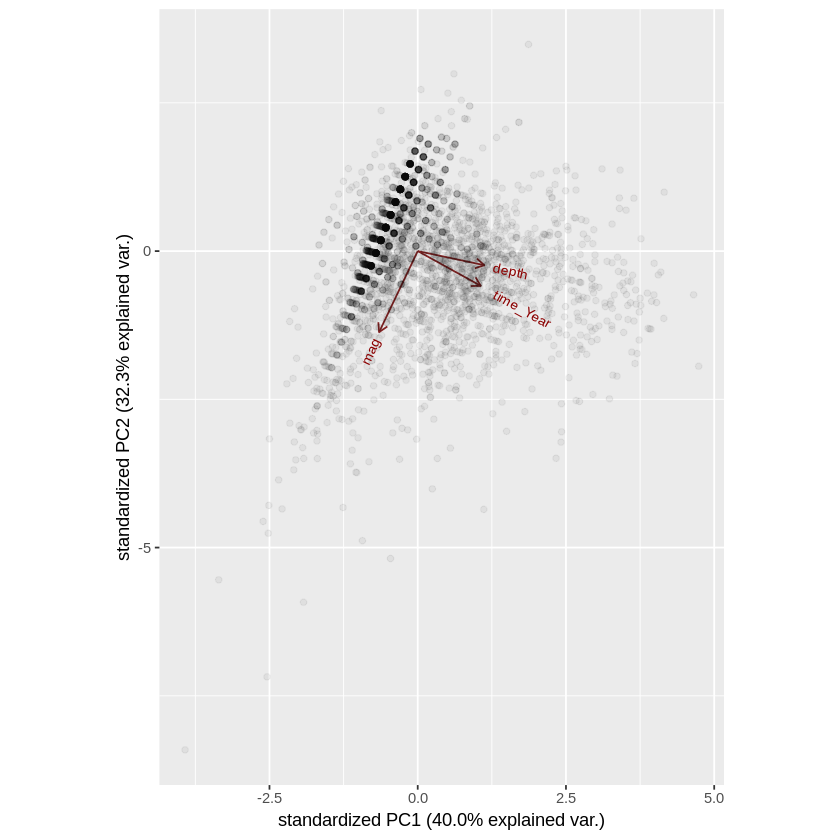

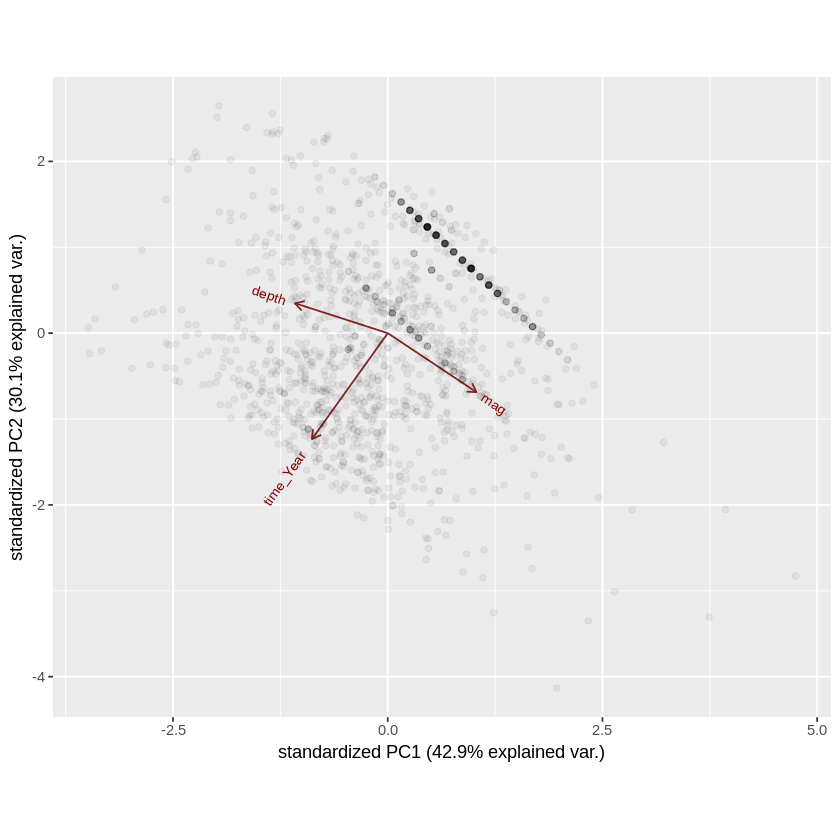

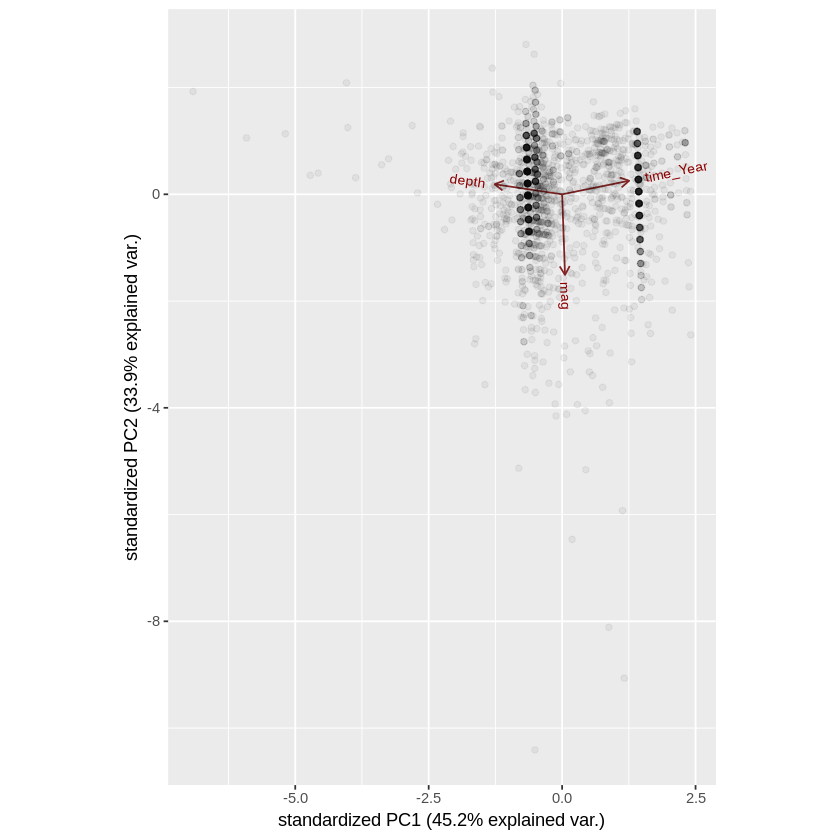

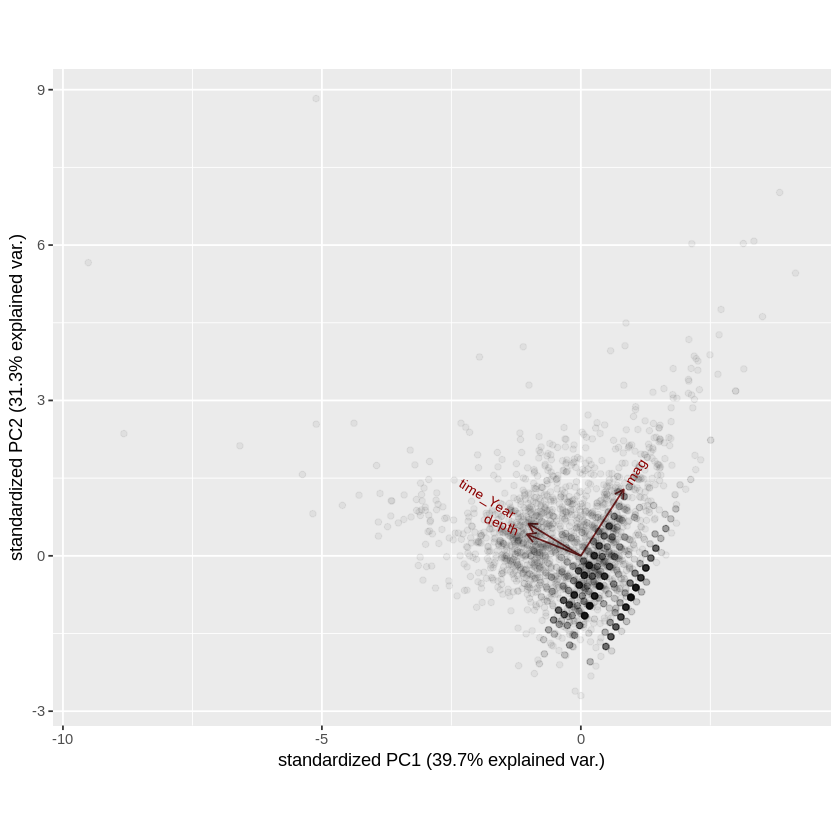

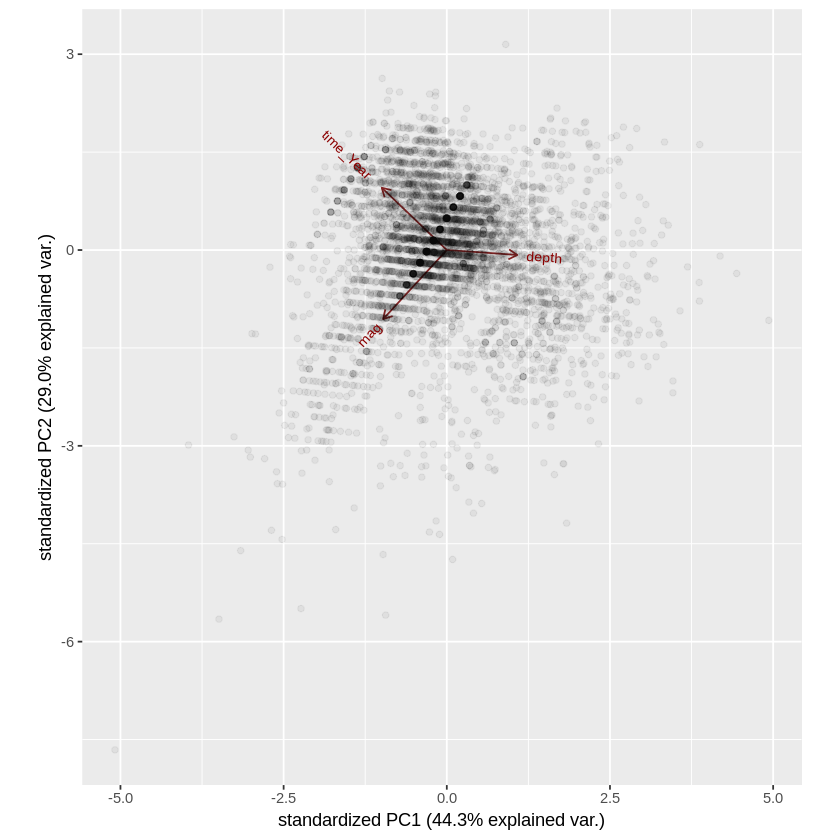

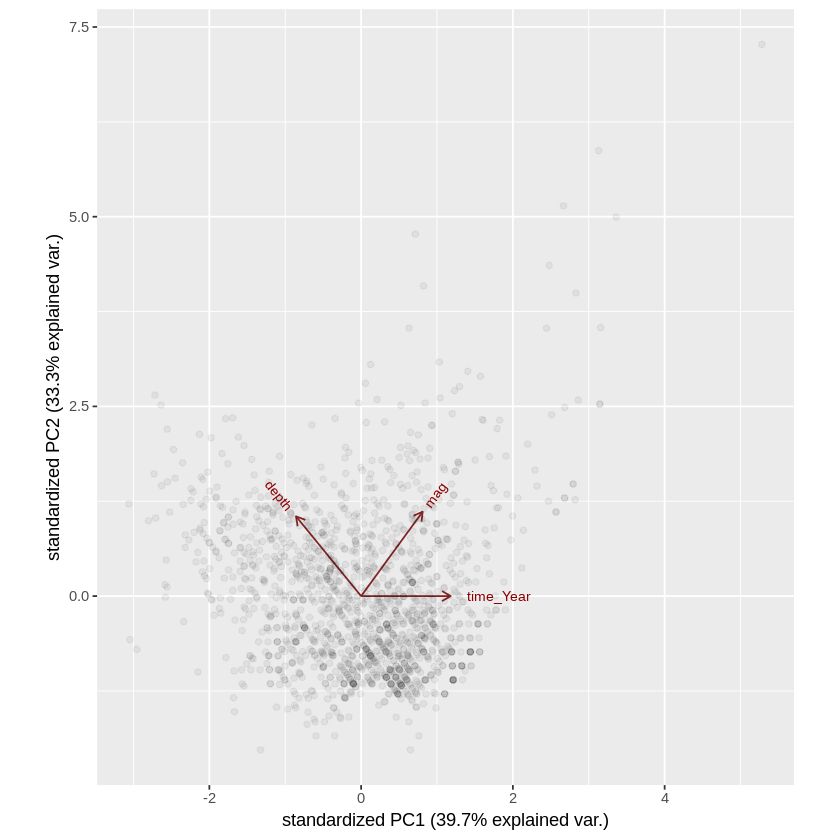

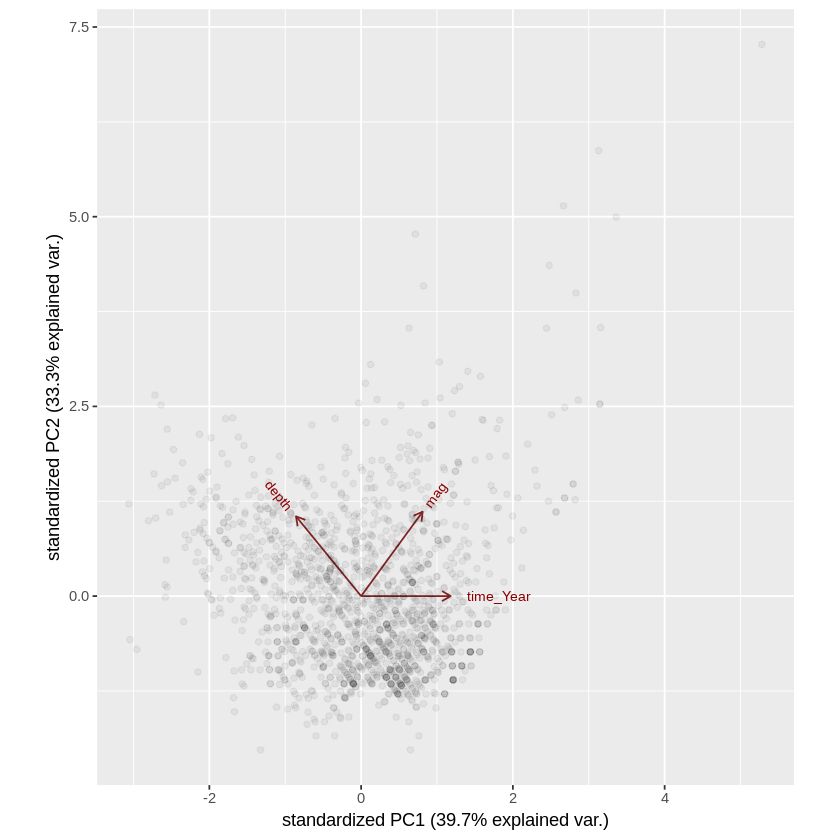

In [80]:
#importing the library for plotting PCA 
library(ggbiplot)

#Created a list of PCAs for each region to iterate through
pcalist = list(PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10)

for (i in 1:length(pcalist)) {
  print(ggbiplot(pcalist[[i]],alpha = 0.05))
}

#PC1 is Depth and PC2 is Mag


### Post Analysis for each region

Region 171 - 74.3% of variation in the data can be explained by depth and mag and that both of them contribute to one another. We can see that time_year doesn't play a big factor here.

Region 669 - 75.3% of variation in the data can be explained by depth and mag and 
that both of them contribute to one another. Time_year contributes to depth here.

Region 54 - 3.1% of variation in the data can be explained by depth and mag and 
that neither of them contribute that much to one another. Time_year affects mag.

Region 593 - 72.3% of variation in the data can be explained by depth and mag and 
that neither of them contribute that much to one another. Time_year affects depth.

Region 65 - 73% of variation in the data can be explained by depth and mag and 
that both of them do contribute to one another. Time_year affects mag and depth.

Region 570 - 79.1% of variation in the data can be explained by depth and mag and 
that both of them do contribute to one another. Time_year doesn't affect mag and depth.

Region 191 - 71% of variation in the data can be explained by depth and mag and 
that mag doesn't contribute to depth, but depth and time_Year contibute to mag.

Region 197 - 73.3% of variation in the data can be explained by depth and mag and 
that none of the three variables contribute very much to one another.

Region 60 - 73% of variation in the data can be explained by depth and mag and 
that depth contributes to mag and time_Year slightly contributes to depth, but that mag is not a big contibutor to either.

Region 553 - 73% of variation in the data can be explained by depth and mag and 
that depth contributes to mag and time_Year slightly contributes to depth, but that mag is not a big contibutor to either.

**Overall we see that time_Year is not a huge factor in analysis.**

# Multiple Linear Regression

After doing the PCA and seeing how the variables interact with one another, a simple multiple regression analysis can be done to see if magnitude can be predicted off of the following variables: depth,latitude,longitude, and time_Year.

# Data Cleanup

This section is dedicated to creating new dataframes for each of the top ten regions with only variables necessary for linear regression. Then after that is completed a correlation matrix will be made to see how the variables correlate to one another. Afterwards linear regression will be done for each region. 

In [93]:
#Now I will make 10 dataframes with only numeric data for multiple linear regression for each region
for (i in c(1,2,3,4,5,6,7,8,9,10)) {
  assign(paste0("lindf_", i), subset(tpts_df, newname == regions[i],select=c(depth,mag,latitude,longitude,time_Year)) )
}
head(lindf_1)

,depth,mag,latitude,longitude,time_Year
8,33.0,4.5,46.281,152.978,1999
260,33.0,4.6,43.828,147.509,1999
403,165.9,4.6,44.723,146.286,1999
531,33.0,3.8,50.503,157.742,1999
553,48.6,4.6,49.566,155.903,1999
634,33.0,4.5,46.304,151.618,1999


In [94]:
#Creating a list to iterate through and do correlation for all variables
linlist = list(lindf_1,lindf_2,lindf_3,lindf_4,lindf_5,lindf_6,lindf_7,lindf_8,lindf_9,lindf_10)

for (i in 1:length(linlist)) {
  print("Corr Matrix for Region:",i)
  print(cor(linlist[[i]]))
}

#After looking at correlation it appears that there is a lot of variation between regions on correlation 
#values for our predictor values magnitude. Correlation is strongest for corr matrix three, or Region 54

[1] "Corr Matrix for Region:"
                depth         mag    latitude   longitude  time_Year
depth      1.00000000 -0.18379346  0.10086939 -0.19753897 0.07084269
mag       -0.18379346  1.00000000 -0.01322929  0.04258259 0.06811138
latitude   0.10086939 -0.01322929  1.00000000  0.92069909 0.05203114
longitude -0.19753897  0.04258259  0.92069909  1.00000000 0.03062888
time_Year  0.07084269  0.06811138  0.05203114  0.03062888 1.00000000
[1] "Corr Matrix for Region:"
                 depth         mag    latitude   longitude    time_Year
depth      1.000000000 -0.25187497  0.68254865 -0.30934854  0.002268696
mag       -0.251874969  1.00000000 -0.14113819  0.15239969  0.059314125
latitude   0.682548651 -0.14113819  1.00000000  0.13166911 -0.017154120
longitude -0.309348540  0.15239969  0.13166911  1.00000000 -0.067199287
time_Year  0.002268696  0.05931413 -0.01715412 -0.06719929  1.000000000
[1] "Corr Matrix for Region:"
                depth        mag    latitude  longitude   time_Y

# Linear Regression Analysis

After the corrlation test is completed, then the regression for each region can begin. All variables will be used in this in this regression although the results of the correlation tests showed that time_year did did not add anything to the variable relationships. Time does not appear to be a huge contributor to this data set. 

In [100]:
library(caret)
#Multiple Linear Regression for Region 171
#Based on the correlation matrix I will keep all variable in the analysis
formula1 <- mag~.
m1 <- train(formula1, lindf_1, method = "lm")
summary(m1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3789 -0.2793 -0.0289  0.2063  3.6938 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.2636322  2.5749738  -3.598 0.000325 ***
depth       -0.0017116  0.0002062  -8.301  < 2e-16 ***
latitude    -0.0030910  0.0128250  -0.241 0.809554    
longitude    0.0023906  0.0085110   0.281 0.778812    
time_Year    0.0068118  0.0012344   5.518 3.62e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.433 on 4438 degrees of freedom
Multiple R-squared:  0.04042,	Adjusted R-squared:  0.03955 
F-statistic: 46.73 on 4 and 4438 DF,  p-value: < 2.2e-16


In [101]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m1$finalModel)[1] # define the intercept
coef.slope <- coef(m1$finalModel)[2] # define the slope
class_coefs <- coef(m1$finalModel)[2:8] # define adjusted slopes per class
lindf_1$pred<-predict(m1, newdata=lindf_1) # find the predicted values of the dataset mpg
head(lindf_1)

,depth,mag,latitude,longitude,time_Year,pred
8,33.0,4.5,46.281,152.978,1999,4.519392
260,33.0,4.6,43.828,147.509,1999,4.513900
403,165.9,4.6,44.723,146.286,1999,4.280742
531,33.0,3.8,50.503,157.742,1999,4.517730
553,48.6,4.6,49.566,155.903,1999,4.489530
634,33.0,4.5,46.304,151.618,1999,4.516070


In [103]:
#Multiple Linear Regression for Region 669
#Based on the correlation matrix I will keep all variable in the analysis
formula2 <- mag~.
m2 <- train(formula2, lindf_2, method = "lm")
summary(m2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4341 -0.2858 -0.0596  0.2199  3.7848 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.347212   3.959258  -2.866 0.004198 ** 
depth        -0.001657   0.000248  -6.681 3.02e-11 ***
latitude      0.002494   0.015675   0.159 0.873624    
longitude     0.028680   0.008531   3.362 0.000788 ***
time_Year     0.005829   0.001862   3.130 0.001771 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4845 on 2116 degrees of freedom
Multiple R-squared:  0.07388,	Adjusted R-squared:  0.07213 
F-statistic:  42.2 on 4 and 2116 DF,  p-value: < 2.2e-16


In [108]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m2$finalModel)[1] # define the intercept
coef.slope <- coef(m2$finalModel)[2] # define the slope
class_coefs <- coef(m2$finalModel)[2:8] # define adjusted slopes per class
lindf_2$pred<-predict(m2, newdata=lindf_2) # find the predicted values of the dataset mpg
head(lindf_2)

,depth,mag,latitude,longitude,time_Year,pred
29,33.0,4.7,42.306,142.317,1999,4.437469
36,33.0,4.4,42.320,141.844,1999,4.423938
374,229.8,4.0,45.149,144.628,1999,4.184729
557,39.9,5.1,43.198,145.925,1999,4.531735
915,94.2,4.8,43.095,144.440,1999,4.398911
1042,146.6,4.4,43.599,144.439,1999,4.313310


In [107]:
#Multiple Linear Regression for Region 54
#Based on the correlation matrix I will keep all variables in the analysis
formula3 <- mag~.
m3 <- train(formula3, lindf_3, method = "lm")
summary(m3)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4719 -0.4389 -0.0144  0.3935  4.4916 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.511e+02  2.525e+00 -59.833   <2e-16 ***
depth        3.547e-03  3.798e-04   9.339   <2e-16 ***
latitude     4.602e-02  4.695e-03   9.803   <2e-16 ***
longitude   -4.926e-01  1.747e-02 -28.198   <2e-16 ***
time_Year    6.021e-02  1.309e-03  46.006   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.622 on 10268 degrees of freedom
Multiple R-squared:  0.3275,	Adjusted R-squared:  0.3273 
F-statistic:  1250 on 4 and 10268 DF,  p-value: < 2.2e-16


In [109]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m3$finalModel)[1] # define the intercept
coef.slope <- coef(m3$finalModel)[2] # define the slope
class_coefs <- coef(m3$finalModel)[2:8] # define adjusted slopes per class
lindf_3$pred<-predict(m3, newdata=lindf_3) # find the predicted values of the dataset mpg
head(lindf_3)

,depth,mag,latitude,longitude,time_Year,pred
104,28.5,3.1,-33.011,-71.735,1999,3.236196
182,38.7,3.4,-32.357,-71.239,1999,3.058135
272,24.2,3.8,-31.640,-71.714,1999,3.273698
281,75.2,3.5,-34.173,-71.274,1999,3.121253
302,20.0,3.8,-32.532,-71.662,1999,3.192133
361,33.0,3.8,-31.545,-71.588,1999,3.247212


In [110]:
#Multiple Linear Regression for Region 593
#Based on the correlation matrix I will keep all variables in the analysis
formula4 <- mag~.
m4 <- train(formula4, lindf_4, method = "lm")
summary(m4)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8886 -0.2706 -0.0488  0.1932  4.0356 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.3828757  3.3190381   3.430 0.000611 ***
depth       -0.0011575  0.0002307  -5.018 5.44e-07 ***
latitude     0.0397187  0.0071066   5.589 2.43e-08 ***
longitude    0.0108597  0.0093176   1.165 0.243885    
time_Year   -0.0039507  0.0016586  -2.382 0.017265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4245 on 4097 degrees of freedom
Multiple R-squared:  0.0233,	Adjusted R-squared:  0.02235 
F-statistic: 24.44 on 4 and 4097 DF,  p-value: < 2.2e-16


In [111]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m4$finalModel)[1] # define the intercept
coef.slope <- coef(m4$finalModel)[2] # define the slope
class_coefs <- coef(m4$finalModel)[2:8] # define adjusted slopes per class
lindf_4$pred<-predict(m4, newdata=lindf_4) # find the predicted values of the dataset mpg
head(lindf_4)

,depth,mag,latitude,longitude,time_Year,pred
143,33.0,4.9,2.682,96.372,1999,4.600367
381,200.0,4.0,5.128,95.278,1999,4.492338
591,122.7,4.4,1.947,99.099,1999,4.496961
2154,200.0,4.1,5.510,95.238,1999,4.507077
2273,189.5,4.1,1.566,99.816,1999,4.412295
2362,75.6,4.4,0.225,98.795,1999,4.479782


In [115]:
#Multiple Linear Regression for Region 65
#Based on the correlation matrix I will keep all variables in the analysis
formula5 <- mag~. 
m5 <- train(formula5, lindf_5, method = "lm")
summary(m5)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3160 -0.3399 -0.0704  0.2487  3.7628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.8410107  5.0624969   4.117 4.06e-05 ***
depth       -0.0044281  0.0006799  -6.513 1.01e-10 ***
latitude     0.0319952  0.0217540   1.471  0.14157    
longitude    0.0358195  0.0199655   1.794  0.07301 .  
time_Year   -0.0064465  0.0024410  -2.641  0.00836 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5034 on 1470 degrees of freedom
Multiple R-squared:  0.04449,	Adjusted R-squared:  0.04189 
F-statistic: 17.11 on 4 and 1470 DF,  p-value: 1.003e-13


In [116]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m5$finalModel)[1] # define the intercept
coef.slope <- coef(m5$finalModel)[2] # define the slope
class_coefs <- coef(m5$finalModel)[2:8] # define adjusted slopes per class
lindf_5$pred<-predict(m5, newdata=lindf_5) # find the predicted values of the dataset mpg
head(lindf_5)

,depth,mag,latitude,longitude,time_Year,pred
444,51.0,4.7,-13.465,-76.442,1999,4.559663
1803,59.3,4.7,-14.370,-75.513,1999,4.527231
3204,47.8,4.8,-12.392,-76.959,1999,4.589645
3822,61.4,4.7,-17.130,-72.613,1999,4.533502
4748,87.2,6.8,-16.660,-72.662,1999,4.432540
5640,56.5,4.4,-16.518,-72.573,1999,4.576213


In [117]:
#Multiple Linear Regression for Region 570
#Based on the correlation matrix I will keep all variables in the analysis
formula6 <- mag~. 
m6 <- train(formula6, lindf_6, method = "lm")
summary(m6)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1579 -0.2710 -0.0596  0.1855  4.5619 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.2264040  5.1001714   4.554 5.54e-06 ***
depth       -0.0026051  0.0009365  -2.782  0.00545 ** 
latitude     0.0086262  0.0079738   1.082  0.27944    
longitude   -0.0176241  0.0069554  -2.534  0.01135 *  
time_Year   -0.0084566  0.0024406  -3.465  0.00054 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4288 on 2313 degrees of freedom
Multiple R-squared:  0.01544,	Adjusted R-squared:  0.01373 
F-statistic: 9.067 on 4 and 2313 DF,  p-value: 2.892e-07


In [118]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m6$finalModel)[1] # define the intercept
coef.slope <- coef(m6$finalModel)[2] # define the slope
class_coefs <- coef(m6$finalModel)[2:8] # define adjusted slopes per class
lindf_6$pred<-predict(m6, newdata=lindf_6) # find the predicted values of the dataset mpg
head(lindf_6)

,depth,mag,latitude,longitude,time_Year,pred
526,33,5.0,4.800,94.454,1999,4.612470
665,100,4.2,4.624,94.397,1999,4.437415
1890,33,4.7,3.965,95.593,1999,4.585193
1984,33,5.6,3.689,90.144,1999,4.678846
3405,33,4.0,2.886,95.892,1999,4.570615
4014,33,4.6,3.015,91.612,1999,4.647159


In [122]:
#Multiple Linear Regression for Region 191
#Based on the correlation matrix I will keep all variables in the analysis
formula7 <- mag~. 
m7 <- train(formula7, lindf_7, method = "lm")
summary(m7)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdat


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1838 -0.3078 -0.0697  0.2043  3.7137 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.7848787  3.7077026   4.257 2.13e-05 ***
depth       -0.0006963  0.0002803  -2.484  0.01303 *  
latitude    -0.0383193  0.0126761  -3.023  0.00252 ** 
longitude   -0.0198984  0.0143199  -1.390  0.16476    
time_Year   -0.0045979  0.0016880  -2.724  0.00649 ** 
pred                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4667 on 3185 degrees of freedom
Multiple R-squared:  0.01637,	Adjusted R-squared:  0.01514 
F-statistic: 13.25 on 4 and 3185 DF,  p-value: 1.039e-10


In [121]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m7$finalModel)[1] # define the intercept
coef.slope <- coef(m7$finalModel)[2] # define the slope
class_coefs <- coef(m7$finalModel)[2:8] # define adjusted slopes per class
lindf_7$pred<-predict(m7, newdata=lindf_7) # find the predicted values of the dataset mag
head(lindf_7)

,depth,mag,latitude,longitude,time_Year,pred
532,152.8,4.3,-3.594,103.128,1999,4.573004
700,212.7,4.0,-4.577,104.690,1999,4.537882
893,33.0,4.1,-3.586,101.769,1999,4.683157
1805,33.0,4.1,-5.533,102.955,1999,4.734165
1841,43.4,4.8,-0.854,98.584,1999,4.634604
2378,27.2,5.1,-5.406,102.195,1999,4.748460


In [123]:
#Multiple Linear Regression for Region 197
#Based on the correlation matrix I will keep all variables in the analysis
formula8 <- mag~. 
m8 <- train(formula8, lindf_8, method = "lm")
summary(m8)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5230 -0.2634 -0.0480  0.1995  4.4564 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.844e+01  3.814e+00  -4.834 1.37e-06 ***
depth       -4.051e-03  3.615e-04 -11.207  < 2e-16 ***
latitude     2.595e-02  6.902e-03   3.760 0.000172 ***
longitude    7.460e-03  1.456e-02   0.513 0.608321    
time_Year    1.051e-02  1.569e-03   6.703 2.26e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4565 on 5309 degrees of freedom
Multiple R-squared:  0.04881,	Adjusted R-squared:  0.0481 
F-statistic: 68.11 on 4 and 5309 DF,  p-value: < 2.2e-16


In [124]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m8$finalModel)[1] # define the intercept
coef.slope <- coef(m8$finalModel)[2] # define the slope
class_coefs <- coef(m8$finalModel)[2:8] # define adjusted slopes per class
lindf_8$pred<-predict(m8, newdata=lindf_8) # find the predicted values of the dataset mpg
head(lindf_8)

,depth,mag,latitude,longitude,time_Year,pred
653,33.0,4.6,40.939,142.261,1999,4.568966
701,33.0,3.6,38.016,142.493,1999,4.494840
736,84.8,3.9,38.259,141.470,1999,4.283661
905,147.2,3.8,40.208,141.060,1999,4.078385
1095,77.8,4.7,37.411,141.889,1999,4.293138
1460,33.0,4.1,36.001,141.667,1999,4.436386


In [125]:
#Multiple Linear Regression for Region 60
#Based on the correlation matrix I will remove depth
formula9 <- mag~latitude+longitude+time_Year
m9 <- train(formula9, lindf_9, method = "lm")
summary(m9)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0361 -0.2330 -0.0782  0.1309  3.8858 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.169677   4.122110  -2.225   0.0263 *  
latitude    -0.004437   0.021564  -0.206   0.8370    
longitude    0.065053   0.020697   3.143   0.0017 ** 
time_Year    0.009747   0.001885   5.172 2.62e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3896 on 1569 degrees of freedom
Multiple R-squared:  0.02548,	Adjusted R-squared:  0.02362 
F-statistic: 13.68 on 3 and 1569 DF,  p-value: 8.304e-09


In [126]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m9$finalModel)[1] # define the intercept
coef.slope <- coef(m9$finalModel)[2] # define the slope
class_coefs <- coef(m9$finalModel)[2:8] # define adjusted slopes per class
lindf_9$pred<-predict(m9, newdata=lindf_9) # find the predicted values of the dataset mpg
head(lindf_9)

,depth,mag,latitude,longitude,time_Year,pred
732,60.0,4.4,14.184,-92.345,1999,4.243612
1259,33.0,4.0,15.698,-93.889,1999,4.136453
1859,87.5,3.4,15.464,-93.577,1999,4.157788
2567,33.0,4.6,14.505,-92.844,1999,4.209727
2823,41.3,4.4,14.108,-92.355,1999,4.243299
3051,58.7,4.0,14.326,-92.698,1999,4.220019


In [127]:
#Multiple Linear Regression for Region 553
#Based on the correlation matrix I will remove depth
formula10 <- mag~latitude+longitude+time_Year
m10 <- train(formula10, lindf_10, method = "lm")
summary(m10)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1545 -0.3580 -0.1304  0.1404  3.7138 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -27.523379  16.647624  -1.653   0.0996 .
latitude      0.053515   0.032634   1.640   0.1024  
longitude    -0.030691   0.026132  -1.174   0.2414  
time_Year     0.016828   0.008092   2.079   0.0387 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6821 on 233 degrees of freedom
Multiple R-squared:  0.03933,	Adjusted R-squared:  0.02696 
F-statistic:  3.18 on 3 and 233 DF,  p-value: 0.02477


In [128]:
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m10$finalModel)[1] # define the intercept
coef.slope <- coef(m10$finalModel)[2] # define the slope
class_coefs <- coef(m10$finalModel)[2:8] # define adjusted slopes per class
lindf_10$pred<-predict(m10, newdata=lindf_10) # find the predicted values of the dataset mpg
head(lindf_10)

,depth,mag,latitude,longitude,time_Year,pred
2167,453.0,4.0,47.917,145.583,1999,4.211713
2763,471.0,3.9,51.410,151.378,1999,4.220785
3278,450.4,4.2,53.370,153.966,1999,4.246246
4289,500.0,3.7,48.095,145.822,1999,4.213903
5959,541.8,3.9,49.242,147.743,1999,4.216327
6618,500.0,3.9,53.461,153.913,1999,4.252743


# Results of Linear Regression 
After doing linear regression with all 10 regions it appears that linear regression may not be a good fit 
for predicting earthquake values. There appears to be a lot of variability in the data and finding a linear
pattern seems to be difficult with it. Most R-squared values were around 0.02-0.04 with the exception of 
Region 54 which had a R-Squared of 0.33. There may be less variability in Region 54 which makes it 
more viable to use for linear regression. 

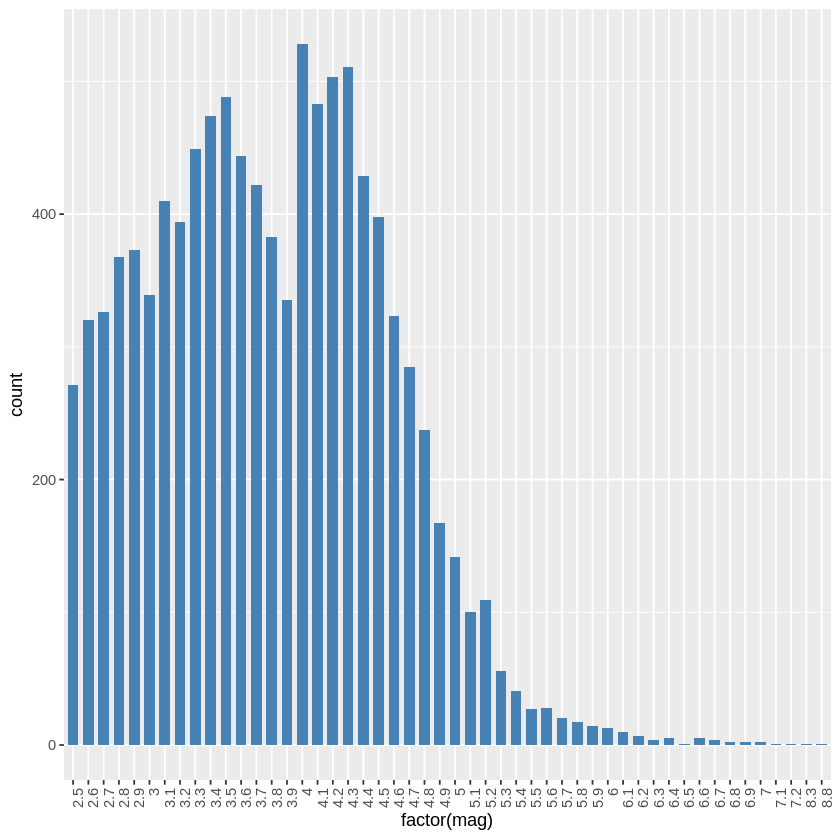

In [134]:
ggplot(lindf_3, aes(x=factor(mag)))+
  geom_bar(stat="count", width=0.7, fill="steelblue") + theme(axis.text.x = element_text(angle = 90, hjust = 1))

#Region 54 has a pretty normal looking right skewed distribution, maybe this contirbuted to the linear distribution?